In [1]:
from sympy import *

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
x,t = symbols('x t') 

In [9]:
L = 20
T = 18

In [10]:
f_init = sin(4*np.pi*x/L)
f_bord = cos(t)

In [11]:
class equation:
    def __init__(self, bord_cond, init_cond, L, T, h, curr ):
        self.bord_cond = lambdify(t, bord_cond)
        self.init_cond = lambdify(x, init_cond)
        self.L = L
        self.T = T
        self.h = h
        self.curr = curr
        self.tau = curr*h
        self.x_steps = int(L/self.h)
        self.t_steps = int(T/self.tau)
        self.generate_grid()
        self.fill_conds()
    def generate_grid(self):
        self.matrix = np.zeros([int(self.T/self.tau), int(self.L/self.h)])
    def fill_conds(self):
        for i in range(len(self.matrix[0])):
            self.matrix[0][i] = self.bord_cond(self.tau*i)
        for j in range(len(self.matrix)):
            self.matrix[j][0] = self.init_cond(self.h*j)
    def count_matrix2(self):
        for i in range(1, self.t_steps):
            for j in range(1, self.x_steps - 1):
                self.matrix[i][j] = self.matrix[i - 1][j] \
                + (self.tau)**2/2*(self.matrix[i-1][j+1] - 2*self.matrix[i-1][j] + self.matrix[i-1][j-1])/(self.h)**2 \
                - self.tau*(self.matrix[i - 1][j+1] - self.matrix[i - 1][j - 1])/2/self.h
            j = self.x_steps - 1
            self.matrix[i][j] = self.matrix[i - 1][j] \
                + (self.tau)**2/2*(self.matrix[i-1][0] - 2*self.matrix[i-1][j] + self.matrix[i-1][j-1])/(self.h)**2 \
                - self.tau*(self.matrix[i - 1][0] - self.matrix[i - 1][j - 1])/2/self.h                                                               
 
    def count_matrix(self):
        for i in range(1, self.t_steps):
            for j in range(1, self.x_steps):
                self.matrix[i][j] = self.matrix[i - 1][j] - self.tau/self.h*(self.matrix[i - 1][j] - self.matrix[i - 1][j - 1])
             

In [12]:
eq1 = equation(f_bord, f_init, L=20, T=18, h=0.5, curr=1.5)

In [13]:
eq2 = equation(f_bord, f_init, L=20, T=18, h=0.5, curr=0.6)
eq2.generate_grid()
eq2.fill_conds()
eq2.count_matrix2()
eq2.matrix

array([[ 0.        ,  0.95533649,  0.82533561, ...,  0.10423603,
         0.39349087,  0.64759634],
       [ 0.30901699,  0.51237508,  0.91218311, ..., -0.0737862 ,
         0.22415589,  0.60333727],
       [ 0.58778525,  0.36678623,  0.7396762 , ..., -0.24938773,
         0.03564192,  0.45664864],
       ...,
       [-0.80901699, -0.99183513, -0.89252576, ...,  0.53208534,
         0.2908316 ,  0.13764988],
       [-0.58778525, -0.91599955, -0.98230895, ...,  0.64914942,
         0.4250152 ,  0.32477713],
       [-0.30901699, -0.75049956, -0.97593691, ...,  0.7392555 ,
         0.5446282 ,  0.48239889]])

In [14]:
eq1.count_matrix2()

In [15]:
eq1.generate_grid()
eq1.fill_conds()
eq1.count_matrix2()
eq1.matrix

array([[ 0.00000000e+00,  7.31688869e-01,  7.07372017e-02,
        -6.28173623e-01, -9.89992497e-01, -8.20559357e-01,
        -2.10795799e-01,  5.12085477e-01,  9.60170287e-01,
         8.93006345e-01,  3.46635318e-01, -3.85747937e-01,
        -9.11130262e-01, -9.47579804e-01, -4.75536928e-01,
         2.51689650e-01,  8.43853959e-01,  9.83187447e-01,
         5.94920663e-01, -1.12593793e-01, -7.59687913e-01,
        -9.99116587e-01, -7.02397058e-01, -2.87556303e-02,
         6.60316708e-01,  9.95048401e-01,  7.95814970e-01,
         1.69529509e-01, -5.47729260e-01, -9.71064315e-01,
        -8.73304640e-01, -3.06910254e-01,  4.24179007e-01,
         9.27644370e-01,  9.33315112e-01,  4.38148187e-01,
        -2.92138809e-01, -8.65657616e-01, -9.74645276e-01,
        -5.60616582e-01],
       [ 3.09016994e-01, -8.88084635e-01,  1.04793002e+00,
         5.46602095e-01, -2.48044681e-01, -9.09585159e-01,
        -1.08302199e+00, -6.75285113e-01,  9.48247908e-02,
         8.14049601e-01,  1.09

In [16]:
f1 = lambdify(t, f_bord)
f2 = lambdify(x, f_init)
print(f1(0), f2(0))

1.0 0.0


In [17]:
eq1.matrix[4]

array([  0.95105652,   7.62152972, -16.8934965 ,  22.94036593,
       -12.69393491,   0.71429056,   1.37959267,   1.30457464,
         0.52949281,  -0.52972664,  -1.30468299,  -1.3795174 ,
        -0.71407206,   0.33456024,   1.20366007,   1.42684911,
         0.88435915,  -0.13269761,  -1.07854589,  -1.44562242,
        -1.03694579,  -0.07182096,   0.9318446 ,   1.4354616 ,
         1.16877795,   0.27490203,  -0.76649244,  -1.39657   ,
        -1.27721701,  -0.47248094,   0.58579892,   1.32972604,
         1.36009256,   0.66060313,  -0.39338064,  -1.2362676 ,
        -1.41879623,  -0.73865398,  -0.16687205,   1.89150272])

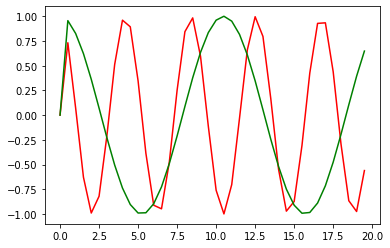

In [18]:
fig1, ax1 = plt.subplots(1)
x_range = [i*eq1.h for i in range(len(eq1.matrix[0]))]
y_range = [eq1.matrix[0][j] for j in range(len(eq1.matrix[0]))]
ax1.plot(x_range, y_range, color='r') 
x_range2 = [i*eq2.h for i in range(len(eq2.matrix[0]))]
y_range2 = [eq2.matrix[0][j] for j in range(len(eq2.matrix[0]))]
ax1.plot(x_range2, y_range2, color='g')